In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


df.describe()

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Count'>

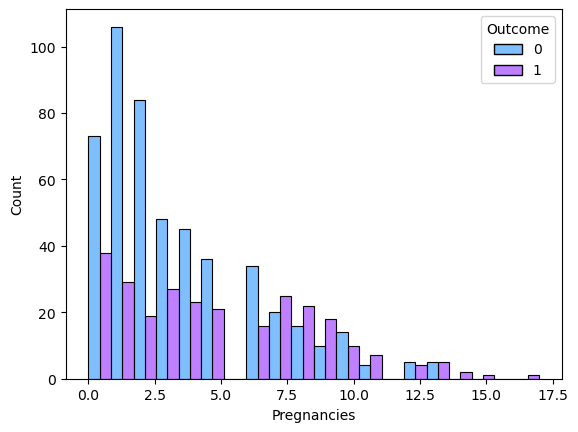

In [47]:
sns.histplot(data= df, x="Pregnancies",hue="Outcome", palette="cool",multiple="dodge",bins = 20)

<Axes: xlabel='Age', ylabel='Count'>

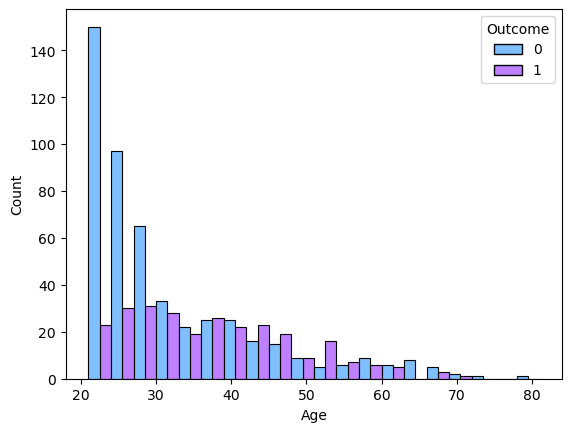

In [46]:
sns.histplot(data= df, x="Age",hue="Outcome", palette="cool",multiple="dodge",bins = 20)

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
from sklearn.svm import SVC

In [57]:
model = SVC()

In [58]:
model.fit(X_train,y_train)

SVC()

In [60]:
predictions = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        96
           1       0.81      0.43      0.56        58

    accuracy                           0.75       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.76      0.75      0.72       154



In [63]:
model.score(X_test,y_test)

0.7467532467532467

In [64]:
print(confusion_matrix(y_test,predictions))

[[90  6]
 [33 25]]


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [72]:
scaled_model = SVC()

In [73]:
scaled_model.fit(X_train,y_train)

SVC()

In [74]:
scaled_predictions = scaled_model.predict(X_test)

In [75]:
print(classification_report(y_test,scaled_predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        96
           1       0.80      0.57      0.67        58

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



In [80]:
scaled_model.score(X_test,y_test)

0.7857142857142857

In [78]:
print(confusion_matrix(y_test,scaled_predictions))

[[88  8]
 [25 33]]
